<a href="https://colab.research.google.com/github/7ydini/BigData/blob/main/BIG_DATA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

лаб 1

примеры кода: факторизация

In [ ]:
# names = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
# for name in names:
#     df[name] = pd.factorize(df[name])[0]
# df.head()

In [ ]:
# df = df.reset_index(drop=True)
# df.head()

непосредственно лаба:---------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras import models
from keras import layers

import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%capture
!wget https://www.dropbox.com/s/5b6o99k5ko6cr1r/train_1.csv
!wget https://www.dropbox.com/s/br8m56fomdxs7lw/train_2.csv
!wget https://www.dropbox.com/s/xmw5shslewwfi0n/test_1.csv
!wget https://www.dropbox.com/s/uxxc48au1zclpu2/test_2.csv

In [ ]:
df = pd.read_csv('train_1.csv')
df.isnull().any()

service_type              False
is_mix_service            False
online_time               False
1_total_fee               False
2_total_fee               False
3_total_fee               False
4_total_fee               False
month_traffic             False
many_over_bill            False
contract_type             False
contract_time             False
is_promise_low_consume    False
net_service               False
pay_times                 False
pay_num                   False
last_month_traffic        False
local_trafffic_month      False
local_caller_time         False
service1_caller_time      False
service2_caller_time      False
gender                    False
age                       False
complaint_level           False
former_complaint_num      False
former_complaint_fee      False
current_service           False
user_id                   False
dtype: bool

In [ ]:
dft = pd.read_csv('test_1.csv')
dft.isnull().any()

service_type              False
is_mix_service            False
online_time               False
1_total_fee               False
2_total_fee               False
3_total_fee               False
4_total_fee               False
month_traffic             False
many_over_bill            False
contract_type             False
contract_time             False
is_promise_low_consume    False
net_service               False
pay_times                 False
pay_num                   False
last_month_traffic        False
local_trafffic_month      False
local_caller_time         False
service1_caller_time      False
service2_caller_time      False
gender                    False
age                       False
complaint_level           False
former_complaint_num      False
former_complaint_fee      False
user_id                   False
dtype: bool

смотрим и чистим

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743990 entries, 0 to 743989
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   service_type            743990 non-null  int64  
 1   is_mix_service          743990 non-null  int64  
 2   online_time             743990 non-null  int64  
 3   1_total_fee             743990 non-null  float64
 4   2_total_fee             743990 non-null  object 
 5   3_total_fee             743990 non-null  object 
 6   4_total_fee             743990 non-null  float64
 7   month_traffic           743990 non-null  float64
 8   many_over_bill          743990 non-null  int64  
 9   contract_type           743990 non-null  int64  
 10  contract_time           743990 non-null  int64  
 11  is_promise_low_consume  743990 non-null  int64  
 12  net_service             743990 non-null  int64  
 13  pay_times               743990 non-null  int64  
 14  pay_num             

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   service_type            200000 non-null  int64  
 1   is_mix_service          200000 non-null  int64  
 2   online_time             200000 non-null  int64  
 3   1_total_fee             200000 non-null  float64
 4   2_total_fee             200000 non-null  object 
 5   3_total_fee             200000 non-null  object 
 6   4_total_fee             200000 non-null  float64
 7   month_traffic           200000 non-null  float64
 8   many_over_bill          200000 non-null  int64  
 9   contract_type           200000 non-null  int64  
 10  contract_time           200000 non-null  int64  
 11  is_promise_low_consume  200000 non-null  int64  
 12  net_service             200000 non-null  int64  
 13  pay_times               200000 non-null  int64  
 14  pay_num             

проверяем и изменяем содержимое

In [ ]:
df = df.drop(df[df['gender']=='\\N'].index)
df = df.drop(df[df['2_total_fee']=='\\N'].index)
df = df.drop(df[df['3_total_fee']=='\\N'].index)

In [ ]:
dft = dft.drop(dft[dft['gender']=='\\N'].index)
dft = dft.drop(dft[dft['2_total_fee']=='\\N'].index)
dft = dft.drop(dft[dft['3_total_fee']=='\\N'].index)

In [ ]:
df['gender'] = df['gender'].astype(int)

In [ ]:
dft['gender'] = dft['gender'].astype(int)

выкидывание 0 из гендера, стоит править

In [ ]:
df = df.drop(df[df['gender']==0].index)

In [ ]:
dft = dft.drop(dft[dft['gender']==0].index)

In [ ]:
df['gender'].value_counts()

1    504974
2    216102
Name: gender, dtype: int64

In [ ]:
df[df['pay_num']<400]['gender'].value_counts()

1    481086
2    204848
Name: gender, dtype: int64

In [ ]:
df['pay_num'].value_counts()

100.00     130515
50.00      102504
30.00       67165
200.00      47107
60.00       28107
            ...  
102.75          1
45.05           1
274.15          1
113.76          1
3258.05         1
Name: pay_num, Length: 12544, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3444697820>]],
      dtype=object)

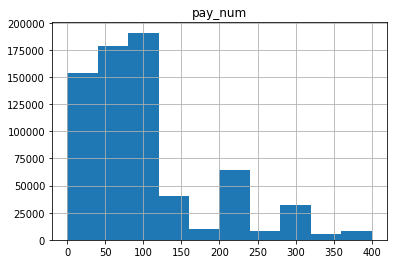

In [ ]:
df.hist(['pay_num'], range = [0, 400])

чистим ненужные столбцы

In [ ]:
del df["user_id"]
del df["pay_times"]

In [ ]:
del dft["user_id"]
del dft["pay_times"]

In [ ]:
df[df['2_total_fee']!=df['3_total_fee']]['2_total_fee'].value_counts()

76.00     8507
56.00     6672
36.00     5548
106.00    4797
136.00    3465
          ... 
508.66       1
731.36       1
356.63       1
144.79       1
0.59         1
Name: 2_total_fee, Length: 44915, dtype: int64

In [ ]:
df['2_total_fee'] = df['2_total_fee'].astype(float)
df['3_total_fee'] = df['3_total_fee'].astype(float)
df['age'] = df['age'].astype(int)

In [ ]:
dft['2_total_fee'] = dft['2_total_fee'].astype(float)
dft['3_total_fee'] = dft['3_total_fee'].astype(float)
dft['age'] = dft['age'].astype(int)

In [ ]:
df[df['age']>200]['age'].count()

0

In [ ]:
df['age'].value_counts()

28    36831
27    34460
26    31504
25    31132
29    30986
      ...  
13        2
90        2
92        1
93        1
99        1
Name: age, Length: 83, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34445dd340>]],
      dtype=object)

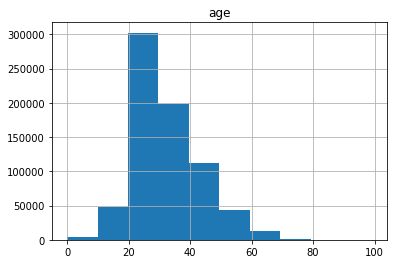

In [ ]:
df.hist(['age'])

исследуем итог:

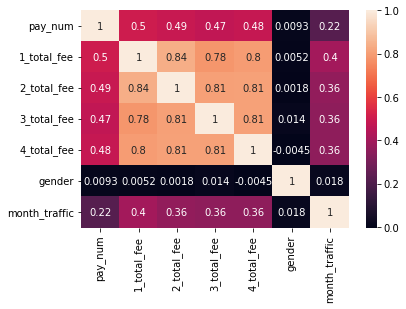

In [ ]:
cols = ['pay_num','1_total_fee','2_total_fee','3_total_fee','4_total_fee','gender', 'month_traffic']
sns.heatmap(df[cols].corr(),cbar=True,annot=True)

код

In [ ]:
df = df.reset_index(drop=True)
df.head()

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service
0,4,0,85,295.96,296.20,296.00,296.80,3813.614698,0,1,...,1392.038508,108.100000,0.000000,564.366667,1,31,0,0,0.0,99999825
1,1,0,10,265.20,261.20,208.50,174.50,0.000000,1,0,...,62852.509718,240.100000,355.166667,0.000000,1,30,0,0,0.0,90063345
2,1,0,12,44.50,70.20,69.00,61.40,2598.397406,0,0,...,1935.242104,27.666667,0.000000,98.416667,2,25,0,0,0.0,90109916
3,4,0,134,87.95,81.40,76.00,88.30,988.440563,0,0,...,988.561075,89.900000,74.483333,121.833333,1,44,0,0,0.0,89950166
4,4,0,84,317.04,314.08,435.51,413.05,5885.800642,0,1,...,0.000000,0.000000,35.100000,496.733333,1,31,2,1,0.0,99999825


In [ ]:
dft = dft.reset_index(drop=True)
dft.head()

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee
0,1,0,18,50.4,108.2,118.9,177.7,300.0,1,0,...,0.0,2639.084859,37.783333,37.783333,0.0,1,19,0,0,0
1,1,0,16,84.4,78.2,56.9,80.4,0.0,1,0,...,0.0,39155.458728,5.183333,41.833333,0.0,1,20,0,0,0
2,1,0,9,80.5,75.6,74.3,93.4,0.0,1,0,...,0.0,48755.950069,63.866667,67.666667,0.0,1,18,0,0,0
3,1,0,15,69.3,63.8,50.2,62.2,0.0,1,0,...,0.0,0.000000,5.750000,11.483333,0.0,1,29,0,0,0
4,1,0,18,37.3,33.2,19.8,19.5,0.0,1,0,...,0.0,5257.352050,4.050000,4.383333,0.0,1,24,0,0,0


простое дерево

In [ ]:
df = df.drop(['current_service'], axis=1)

In [ ]:
train_values = df['gender']
train_points = df.drop(['gender'], axis=1)

test_values = dft['gender']
test_points = dft.drop(['gender'], axis=1)

In [ ]:
test_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198377 entries, 0 to 198376
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   service_type            198377 non-null  int64  
 1   is_mix_service          198377 non-null  int64  
 2   online_time             198377 non-null  int64  
 3   1_total_fee             198377 non-null  float64
 4   2_total_fee             198377 non-null  float64
 5   3_total_fee             198377 non-null  float64
 6   4_total_fee             198377 non-null  float64
 7   month_traffic           198377 non-null  float64
 8   many_over_bill          198377 non-null  int64  
 9   contract_type           198377 non-null  int64  
 10  contract_time           198377 non-null  int64  
 11  is_promise_low_consume  198377 non-null  int64  
 12  net_service             198377 non-null  int64  
 13  pay_num                 198377 non-null  float64
 14  last_month_traffic  

In [ ]:
train_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721076 entries, 0 to 721075
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   service_type            721076 non-null  int64  
 1   is_mix_service          721076 non-null  int64  
 2   online_time             721076 non-null  int64  
 3   1_total_fee             721076 non-null  float64
 4   2_total_fee             721076 non-null  float64
 5   3_total_fee             721076 non-null  float64
 6   4_total_fee             721076 non-null  float64
 7   month_traffic           721076 non-null  float64
 8   many_over_bill          721076 non-null  int64  
 9   contract_type           721076 non-null  int64  
 10  contract_time           721076 non-null  int64  
 11  is_promise_low_consume  721076 non-null  int64  
 12  net_service             721076 non-null  int64  
 13  pay_num                 721076 non-null  float64
 14  last_month_traffic  

In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators=10)
rf_model.fit(train_points, train_values)
test_predict_rf = rf_model.predict(test_points)
print(accuracy_score(test_values, test_predict_rf))

0.6873175821793858


In [ ]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.0


In [ ]:
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
rf_model.fit(train_points, train_values)
test_predict_rf = rf_model.predict(test_points)
print(accuracy_score(test_values, test_predict_rf))

0.702546162105486


In [ ]:
fi = pd.DataFrame({'feature': list(train_points.columns),
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [ ]:
fi

,feature,importance
6,4_total_fee,0.093388
4,2_total_fee,0.089971
3,1_total_fee,0.089646
5,3_total_fee,0.089397
15,local_trafffic_month,0.087423
19,age,0.075875
16,local_caller_time,0.074981
2,online_time,0.071683
18,service2_caller_time,0.070862
13,pay_num,0.061860
